In [37]:
import numpy as np
import matplotlib.pyplot as plt
from HuffmanCoding import HuffmanCodingHeap
from tqdm import tqdm
from IPython.display import display
import string
import random
import math
import time

In [32]:
def generate_test(n):
    #65-97
    # symbol = list(np.random.random_integers(65, 97, (n,)))
    # symbol = [np.random.randint(65, 91) for _ in range(n)]
    # symbols = [chr(i) for i in symbol]

    # length of 'symbol' must be at 52^length >= n
    length = math.ceil(math.log(n, 52)) + 1
    seen = {}
    symbols = []
    i = 0
    while i < n:
        c = ''.join(random.choice(string.ascii_letters) for i in range(length))
        if c in seen:
            continue

        symbols.append(c)
        i += 1
    # freqs = list(np.random.random_integers(0, 100, (n,)))]
    freqs = [np.random.randint(0, 101) for _ in range(n)]

    return symbols, freqs

In [33]:
test_sizes = [2**i for i in range(20)]
test_sets = {}
for test_size in tqdm(test_sizes, desc='Generating Test Sets'):
    symbols, frequencies = generate_test(test_size)

    test_sets[test_size] = {'symbols': symbols, 'frequencies': frequencies}


Generating Test Sets: 100%|██████████| 20/20 [00:14<00:00,  1.35it/s] 


In [34]:
display(test_sets[8])

{'symbols': ['Yq', 'BP', 'eB', 'lk', 'Fq', 'TT', 'XW', 'Cu'], 'frequencies': [65, 100, 46, 50, 98, 6, 19, 82]}

In [46]:
results = []
for test in tqdm(list(test_sets.keys()), desc='Building Huffman Codings for Test Sets'):
    sym = test_sets[test]['symbols']
    freq = test_sets[test]['frequencies']
    huffman = HuffmanCodingHeap(sym, freq)
    start_time = time.time_ns()
    huffman.encode()
    end_time = time.time_ns()
    elapsed_time = end_time - start_time
    results.append(elapsed_time)
    # huffman.print_codes()

Building Huffman Codings for Test Sets: 100%|██████████| 20/20 [00:19<00:00,  1.01it/s]


In [53]:
scaling_factor = 2000
hypo = [scaling_factor * (n*math.log(n)) for n in test_sizes]

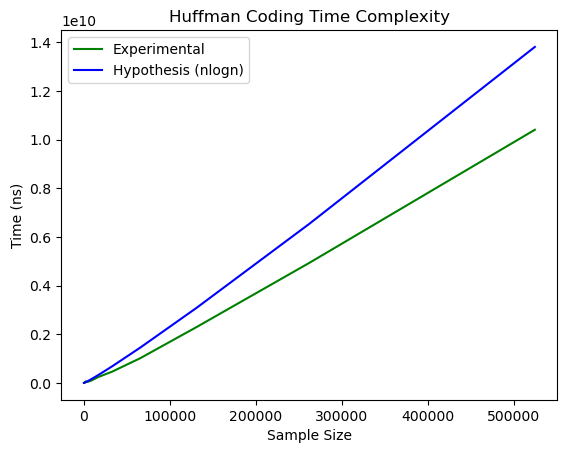

In [57]:
plt.plot(test_sizes, results,label='Experimental', color='g')
plt.plot(test_sizes, hypo,label='Hypothesis (nlogn)', color='b')

plt.title('Huffman Coding Time Complexity')
plt.xlabel('Sample Size')
plt.ylabel('Time (ns)')

plt.xscale('linear')
plt.yscale('linear')

plt.legend()


In [59]:
import pandas as pd

In [ ]:
results_df = pd.DataFrame(columns=['Experimental', 'Theoretical'])